In [14]:
%pylab
%matplotlib notebook
from glob import glob
import ipywidgets as widgets
from IPython.display import display

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [5]:
images = sorted(glob("/data/Implicit3DCNNTasks/toyexample1/img*npy"))
segs   = sorted(glob("/data/Implicit3DCNNTasks/toyexample1/seg*npy"))

Enter index. 10
/data/Implicit3DCNNTasks/toyexample1/img_107.npy /data/Implicit3DCNNTasks/toyexample1/seg_107.npy


<IPython.core.display.Javascript object>


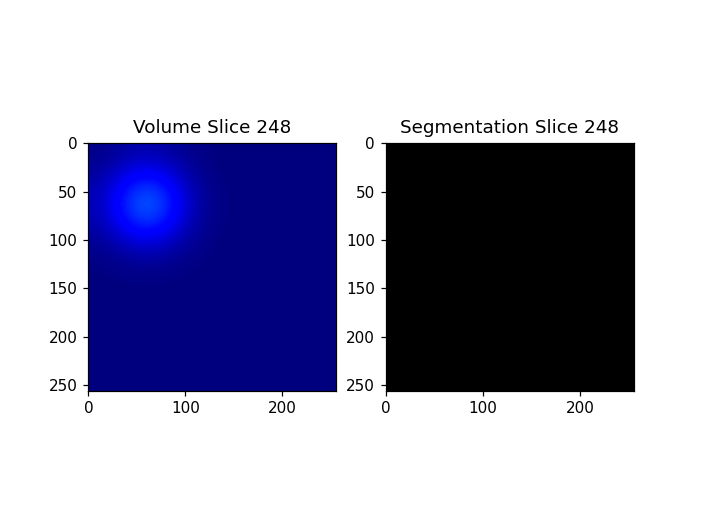

IntSlider(value=0, max=255)

In [24]:
# enter image
idx = int(input("Enter index. "))
img, seg = np.load(images[idx]), np.load(segs[idx])
print(images[idx], segs[idx])

fig, axs = plt.subplots(1, 2)

# Plot the first slice of the volume and segmentation images
axs[0].imshow(img[:, :, 0], cmap='jet', vmin=0, vmax=1)
axs[0].set_title('Volume Slice 0')
axs[1].imshow(seg[:, :, 0], cmap='gray', vmin=0, vmax=1)
axs[1].set_title('Segmentation Slice 0')

# Define the slider widget to change the slice index
slider = widgets.IntSlider(min=0, max=255, step=1, value=0)

# Define the function to update the image slices based on the slider value
def update_slice(slice_idx):
    axs[0].imshow(img[:, :, slice_idx], cmap='jet', vmin=0, vmax=1)
    axs[0].set_title(f'Volume Slice {slice_idx}')
    axs[1].imshow(seg[:, :, slice_idx], cmap='gray', vmin=0, vmax=1)
    axs[1].set_title(f'Segmentation Slice {slice_idx}')
    fig.canvas.draw()

# Attach the slider widget to the update_slice function
slider.observe(lambda event: update_slice(event.new), names='value')

# Display the slider widget and initial image slices
display(slider)
plt.show()